<a href="https://colab.research.google.com/github/vaishnavi-chowdary/Detection-of-COVID-19-Using-X-Ray/blob/main/Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset:http://cb.lk/covid_19

!wget http://cb.lk/covid_19


In [ ]:
!unzip covid_19

In [18]:
TRAIN_PATH="CovidDataset/Train"
Val_PATH="CovidDataset/Test"

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [21]:
# CNN Based Model in Keras

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(63,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['accuracy'])




In [ ]:
model.summary()

In [23]:
#Train from Scratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset= image.ImageDataGenerator(rescale=1./255)



In [24]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

In [27]:
validation_generator=test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [33]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 9s 2s/step - loss: 0.3541 - accuracy: 0.8802 - val_loss: 0.2798 - val_accuracy: 0.9333
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.4323 - accuracy: 0.7708 - val_loss: 0.3122 - val_accuracy: 0.9500
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.3064 - accuracy: 0.8802 - val_loss: 0.1665 - val_accuracy: 0.9500
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.2748 - accuracy: 0.8854 - val_loss: 0.2774 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.2396 - accuracy: 0.9167 - val_loss: 0.1269 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.2143 - accuracy: 0.9219 - val_loss: 0.1694 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.1259 - val_accuracy: 0.9667
Epoch 8/10
6/6 [=========================

# LOSS IS VERY LESS


In [34]:
model.save("model_adv.h5")

In [35]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1395721584558487, 0.9330357313156128]

In [36]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.06271656602621078, 0.9833333492279053]

TEST IMAGES

In [37]:
model=load_model('model_adv.h5')

In [38]:
import os

In [39]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [40]:
y_actual=[]
y_test=[]

In [42]:
for i in os.listdir("./CovidDataset/Val/Normal"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
for i in os.listdir("./CovidDataset/Val/Covid"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_actual,y_test)

In [52]:
import seaborn as sns

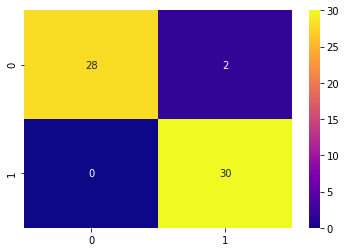

In [53]:
sns.heatmap(cm,cmap="plasma",annot=True)